In [86]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets.reuters import load_data, get_word_index
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

warnings.filterwarnings('ignore')

%matplotlib inline



In [87]:
import nltk 
nltk.download('reuters')
nltk.download('punkt')

from nltk.corpus import reuters

documentos = reuters.fileids()

texto_original = reuters.raw(documentos[0])
print("Texto original del primer documento : ")
print(texto_original)

Texto original del primer documento : 
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
 

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\chapu\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chapu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
print("Ejemplo de una noticia en formato de indices: ")
documentos[0:100]

Ejemplo de una noticia en formato de indices: 


['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [89]:
n_words = 10000

(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split=0.3)

n_train_size = X_train.shape[0]

#? Impresion 

print("-" * 50)
print("Training data X shape : {}" .format(X_train.shape))
print("Training data Y shape : {}" .format(y_train.shape))
print("-" * 50)
print("Testing data X shape : {}" .format(X_test.shape))
print("Testing data Y shape : {}" .format(y_test.shape))
print("-" * 50)

n_train_size

--------------------------------------------------
Training data X shape : (7859,)
Training data Y shape : (7859,)
--------------------------------------------------
Testing data X shape : (3369,)
Testing data Y shape : (3369,)
--------------------------------------------------


7859

In [90]:
print("Ejemplo de una noticia en formato de indice : ")
print(X_train[0])

Ejemplo de una noticia en formato de indice : 
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [91]:
my_dict = get_word_index()
my_dict_inv = {v: k for k, v in my_dict.items()}
print(my_dict_inv.get(5, "No existe en el diccionario"))

said


In [92]:
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [93]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [94]:
print([len(a) for a in X_train[0:1000]])

[87, 56, 139, 224, 101, 116, 100, 100, 82, 106, 31, 59, 65, 316, 527, 76, 114, 17, 91, 77, 231, 108, 83, 29, 95, 110, 23, 373, 114, 354, 133, 222, 571, 155, 83, 208, 170, 269, 74, 19, 23, 78, 21, 377, 104, 299, 89, 56, 94, 139, 118, 36, 137, 107, 83, 66, 70, 112, 88, 51, 83, 123, 17, 185, 84, 52, 102, 73, 106, 486, 107, 82, 263, 172, 491, 190, 143, 62, 26, 88, 114, 38, 85, 112, 793, 104, 25, 21, 101, 28, 25, 81, 135, 73, 62, 18, 90, 266, 91, 64, 409, 92, 319, 166, 85, 200, 152, 474, 60, 58, 584, 71, 273, 51, 255, 28, 171, 143, 91, 46, 110, 77, 162, 24, 52, 175, 61, 95, 97, 259, 112, 73, 94, 17, 650, 23, 88, 309, 105, 89, 41, 314, 54, 374, 67, 160, 75, 207, 373, 84, 87, 74, 98, 136, 256, 95, 50, 108, 52, 100, 233, 86, 68, 47, 73, 158, 113, 23, 100, 80, 202, 104, 122, 101, 95, 118, 253, 192, 80, 183, 29, 604, 41, 103, 63, 147, 472, 58, 23, 37, 98, 73, 122, 812, 51, 179, 56, 60, 60, 25, 212, 34, 406, 122, 27, 86, 83, 43, 208, 26, 159, 65, 48, 335, 701, 314, 333, 68, 263, 124, 337, 180, 67

In [95]:
my_dict = get_word_index()
my_dict_inv = {v: k for k, v in my_dict.items()}
print(my_dict_inv.get(369, "No existe en el diccionario"))

traders


In [96]:
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [97]:
print("Ejemplo de una noticia en formato de indice : ")
print(y_train[0:100])

Ejemplo de una noticia en formato de indice : 
[ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21 11  4  4  3
  3  1  3  1  3 16  1  4 13 20  1  4  4 11  3  3  3 11 16  4  4 20 18 25
 19  3  4  3  4  3  4  3  3  4  4  3  4  4  3 19 35  8  4  4  3 16 25  3
 11  3  9 16 38 10  4  4  9  3  3 28 20  3  3  3  3  3  4  4  3  4  2  3
  1  3 19  4]


In [98]:
categorias_unicas = np.unique(y_train)
print("Categorias unicas de Y_train")
print(categorias_unicas)

Categorias unicas de Y_train
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [99]:
sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))

list(sorted_dict.items())[0:200]

[('the', 1),
 ('of', 2),
 ('to', 3),
 ('in', 4),
 ('said', 5),
 ('and', 6),
 ('a', 7),
 ('mln', 8),
 ('3', 9),
 ('for', 10),
 ('vs', 11),
 ('dlrs', 12),
 ('it', 13),
 ('reuter', 14),
 ('000', 15),
 ('1', 16),
 ('pct', 17),
 ('on', 18),
 ('from', 19),
 ('is', 20),
 ('that', 21),
 ('its', 22),
 ('cts', 23),
 ('by', 24),
 ('at', 25),
 ('year', 26),
 ('be', 27),
 ('with', 28),
 ('2', 29),
 ('will', 30),
 ('was', 31),
 ('billion', 32),
 ('he', 33),
 ('u', 34),
 ('s', 35),
 ('net', 36),
 ('has', 37),
 ('would', 38),
 ('an', 39),
 ('as', 40),
 ('5', 41),
 ('not', 42),
 ('loss', 43),
 ('4', 44),
 ('1986', 45),
 ('company', 46),
 ('which', 47),
 ('but', 48),
 ('this', 49),
 ('shr', 50),
 ('last', 51),
 ('are', 52),
 ('lt', 53),
 ('have', 54),
 ('or', 55),
 ('6', 56),
 ('bank', 57),
 ('7', 58),
 ('were', 59),
 ('8', 60),
 ('had', 61),
 ('oil', 62),
 ('trade', 63),
 ('share', 64),
 ('one', 65),
 ('about', 66),
 ('0', 67),
 ('inc', 68),
 ('9', 69),
 ('new', 70),
 ('profit', 71),
 ('also', 72),
 ('

In [100]:
i_news = 0

news = list(pd.Series(X_train[i_news]).apply(lambda x: my_dict_inv[x]))
print(' '.join(news))

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


In [101]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [102]:
y = np.concatenate((y_train, y_test), axis = 0)
y = to_categorical(y, 46)

y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

In [103]:
y_test
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
n_neurons = 100

n_input = 100

In [105]:
my_model = Sequential()

my_model.add(Embedding(n_words, n_input, input_length=1000))

my_model.add(LSTM(units=n_neurons, return_sequences=False, input_shape=(None, n_input), activation='tanh'))

my_model.add(Dense(units=n_cat, activation='softmax'))


In [106]:
my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
import tensorflow as tf

my_model = Sequential()

my_model.add(Embedding(input_dim=n_words, output_dim=n_input, input_length=1000))

my_model.add(LSTM(units=n_neurons, return_sequences=False, activation='tanh'))

my_model.add(Dense(units=n_cat, activation='softmax'))

my_model.build(input_shape=(None, 1000))

my_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 1000, 100)      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 46)             │         4,646 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,085,046 (4.14 MB)

 Trainable params: 1,085,046 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [108]:
n_epochs = 20
batch_size = 20
learn_rate = 0.001

In [109]:
my_optimizer = Adam(learning_rate=learn_rate)

my_model.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['accuracy']
)

In [110]:
my_summary = my_model.fit(
    X_train, 
    y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4143 - loss: 2.4769 - val_accuracy: 0.5324 - val_loss: 1.9019
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5265 - loss: 1.8892 - val_accuracy: 0.5700 - val_loss: 1.7052
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5720 - loss: 1.7209 - val_accuracy: 0.5840 - val_loss: 1.6533
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.6078 - loss: 1.5688 - val_accuracy: 0.6132 - val_loss: 1.5539
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.6603 - loss: 1.2940 - val_accuracy: 0.6482 - val_loss: 1.3805
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7340 - loss: 1.0357 - val_accuracy: 0.6444 - val_loss: 1.4216
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7786 - loss: 0.8697 - val_accuracy: 0.6768 - val_loss: 1.4145
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8201 - loss: 0.6876 - 

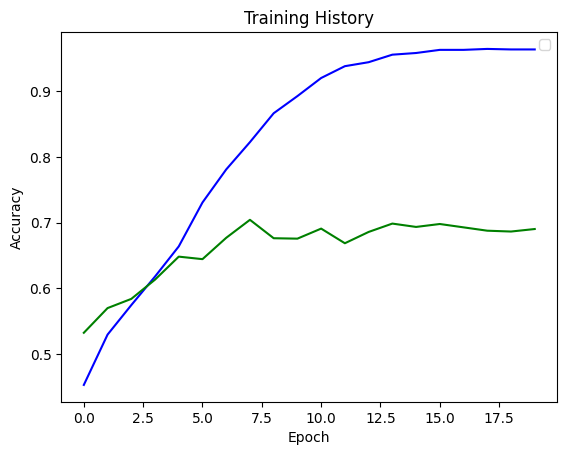

In [112]:
plt.plot(my_summary.history["accuracy"], c='b')
plt.plot(my_summary.history["val_accuracy"], c='g')
plt.title("Training History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()